<a href="https://colab.research.google.com/github/hajajaved/The-Sparks-Foundation-tasks/blob/main/GRIP_task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPLEMENTED DECISION TREE CLASSIFIER IN PYTHON 
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
pd.read_csv("Iris.csv")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
train_df = pd.read_csv("Iris.csv").drop('Id',1)
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
train_df['Species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [ ]:
train_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:

def label_replace(x):
    if x== 'Iris-setosa':
        return 0
    if x== 'Iris-versicolor':
        return 1
    if x== 'Iris-virginica':
        return 2

train_df['Species']=train_df['Species'].apply(lambda x : int(label_replace(x)))
train_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


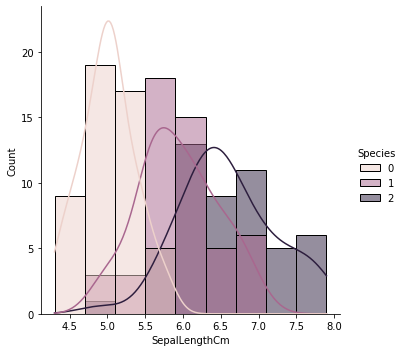

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(train_df, x="SepalLengthCm", hue= "Species",kde=True)

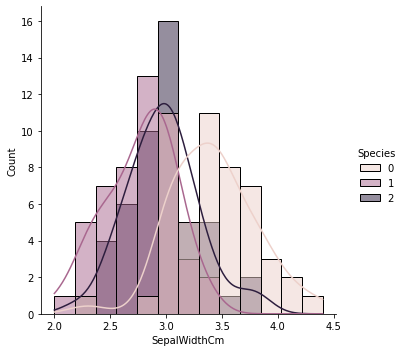

In [ ]:
sns.displot(train_df, x="SepalWidthCm", hue= "Species",kde=True)

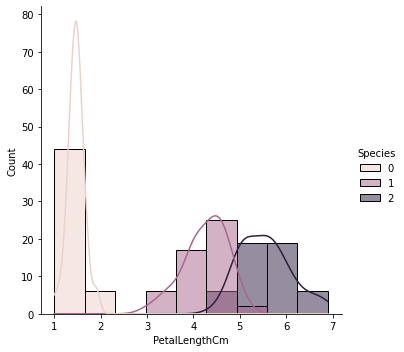

In [ ]:
sns.displot(train_df, x="PetalLengthCm", hue= "Species",kde=True)

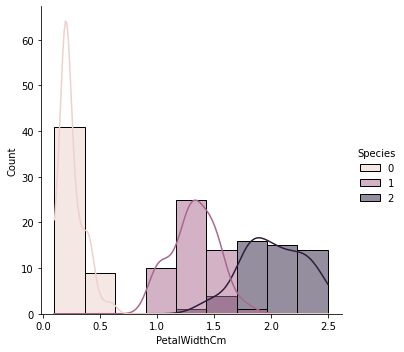

In [ ]:
sns.displot(train_df, x="PetalWidthCm", hue= "Species",kde=True)

In [ ]:
from sklearn.metrics import accuracy_score
depth = []
accuracy = []
for i in range(1,10):
    clf = DecisionTreeClassifier(max_depth = i)
    X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Species',1), train_df['Species'], test_size = 0.25)
    clf.fit(X_train, y_train)
    depth.append(i)
    accuracy.append(accuracy_score(np.array(y_test), clf.predict(X_test)))
    print(i," ",accuracy_score(np.array(y_test), clf.predict(X_test)))

# accuracy decreases slightly after depth 5 prolly due to overfitting. Hence five is chosen as max depth

1   0.5263157894736842
2   0.9736842105263158
3   0.9473684210526315
4   0.8947368421052632
5   0.8947368421052632
6   0.8947368421052632
7   0.9473684210526315
8   0.9736842105263158
9   1.0


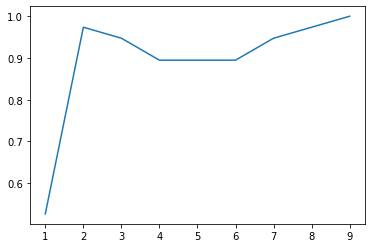

In [ ]:
plt.plot(depth,accuracy)

[Text(279.0, 498.3, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [38, 38, 36]'),
 Text(236.07692307692307, 407.70000000000005, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(321.9230769230769, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 38, 36]'),
 Text(171.69230769230768, 317.1, 'X[2] <= 5.05\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(85.84615384615384, 226.5, 'X[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(42.92307692307692, 135.89999999999998, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(128.76923076923077, 135.89999999999998, 'X[2] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(85.84615384615384, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(171.69230769230768, 45.299999999999955, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(257.53846153846155, 226.5, 'X[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(214.61538461538458, 135.89

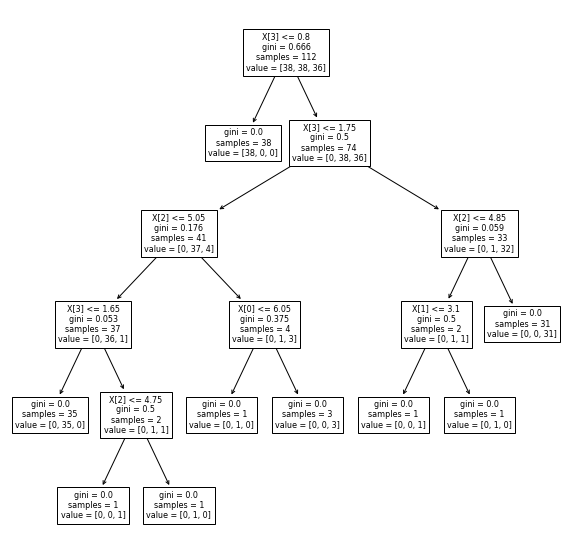

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth = 5) 
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Species',1), train_df['Species'], test_size = 0.25)
clf.fit(X_train, y_train)
fig=plt.figure(figsize=(10,10))
tree.plot_tree(clf)


[Text(1162.5, 2076.25, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [38, 38, 36]\nclass = setosa'),
 Text(983.6538461538461, 1698.75, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(1341.3461538461538, 1698.75, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 74\nvalue = [0, 38, 36]\nclass = versicolor'),
 Text(715.3846153846154, 1321.25, 'petal length (cm) <= 5.05\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]\nclass = versicolor'),
 Text(357.6923076923077, 943.75, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(178.84615384615384, 566.25, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(536.5384615384615, 566.25, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(357.6923076923077, 188.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(715.3846153846154, 188.75, 'gini = 0.0\nsamples = 1\nva

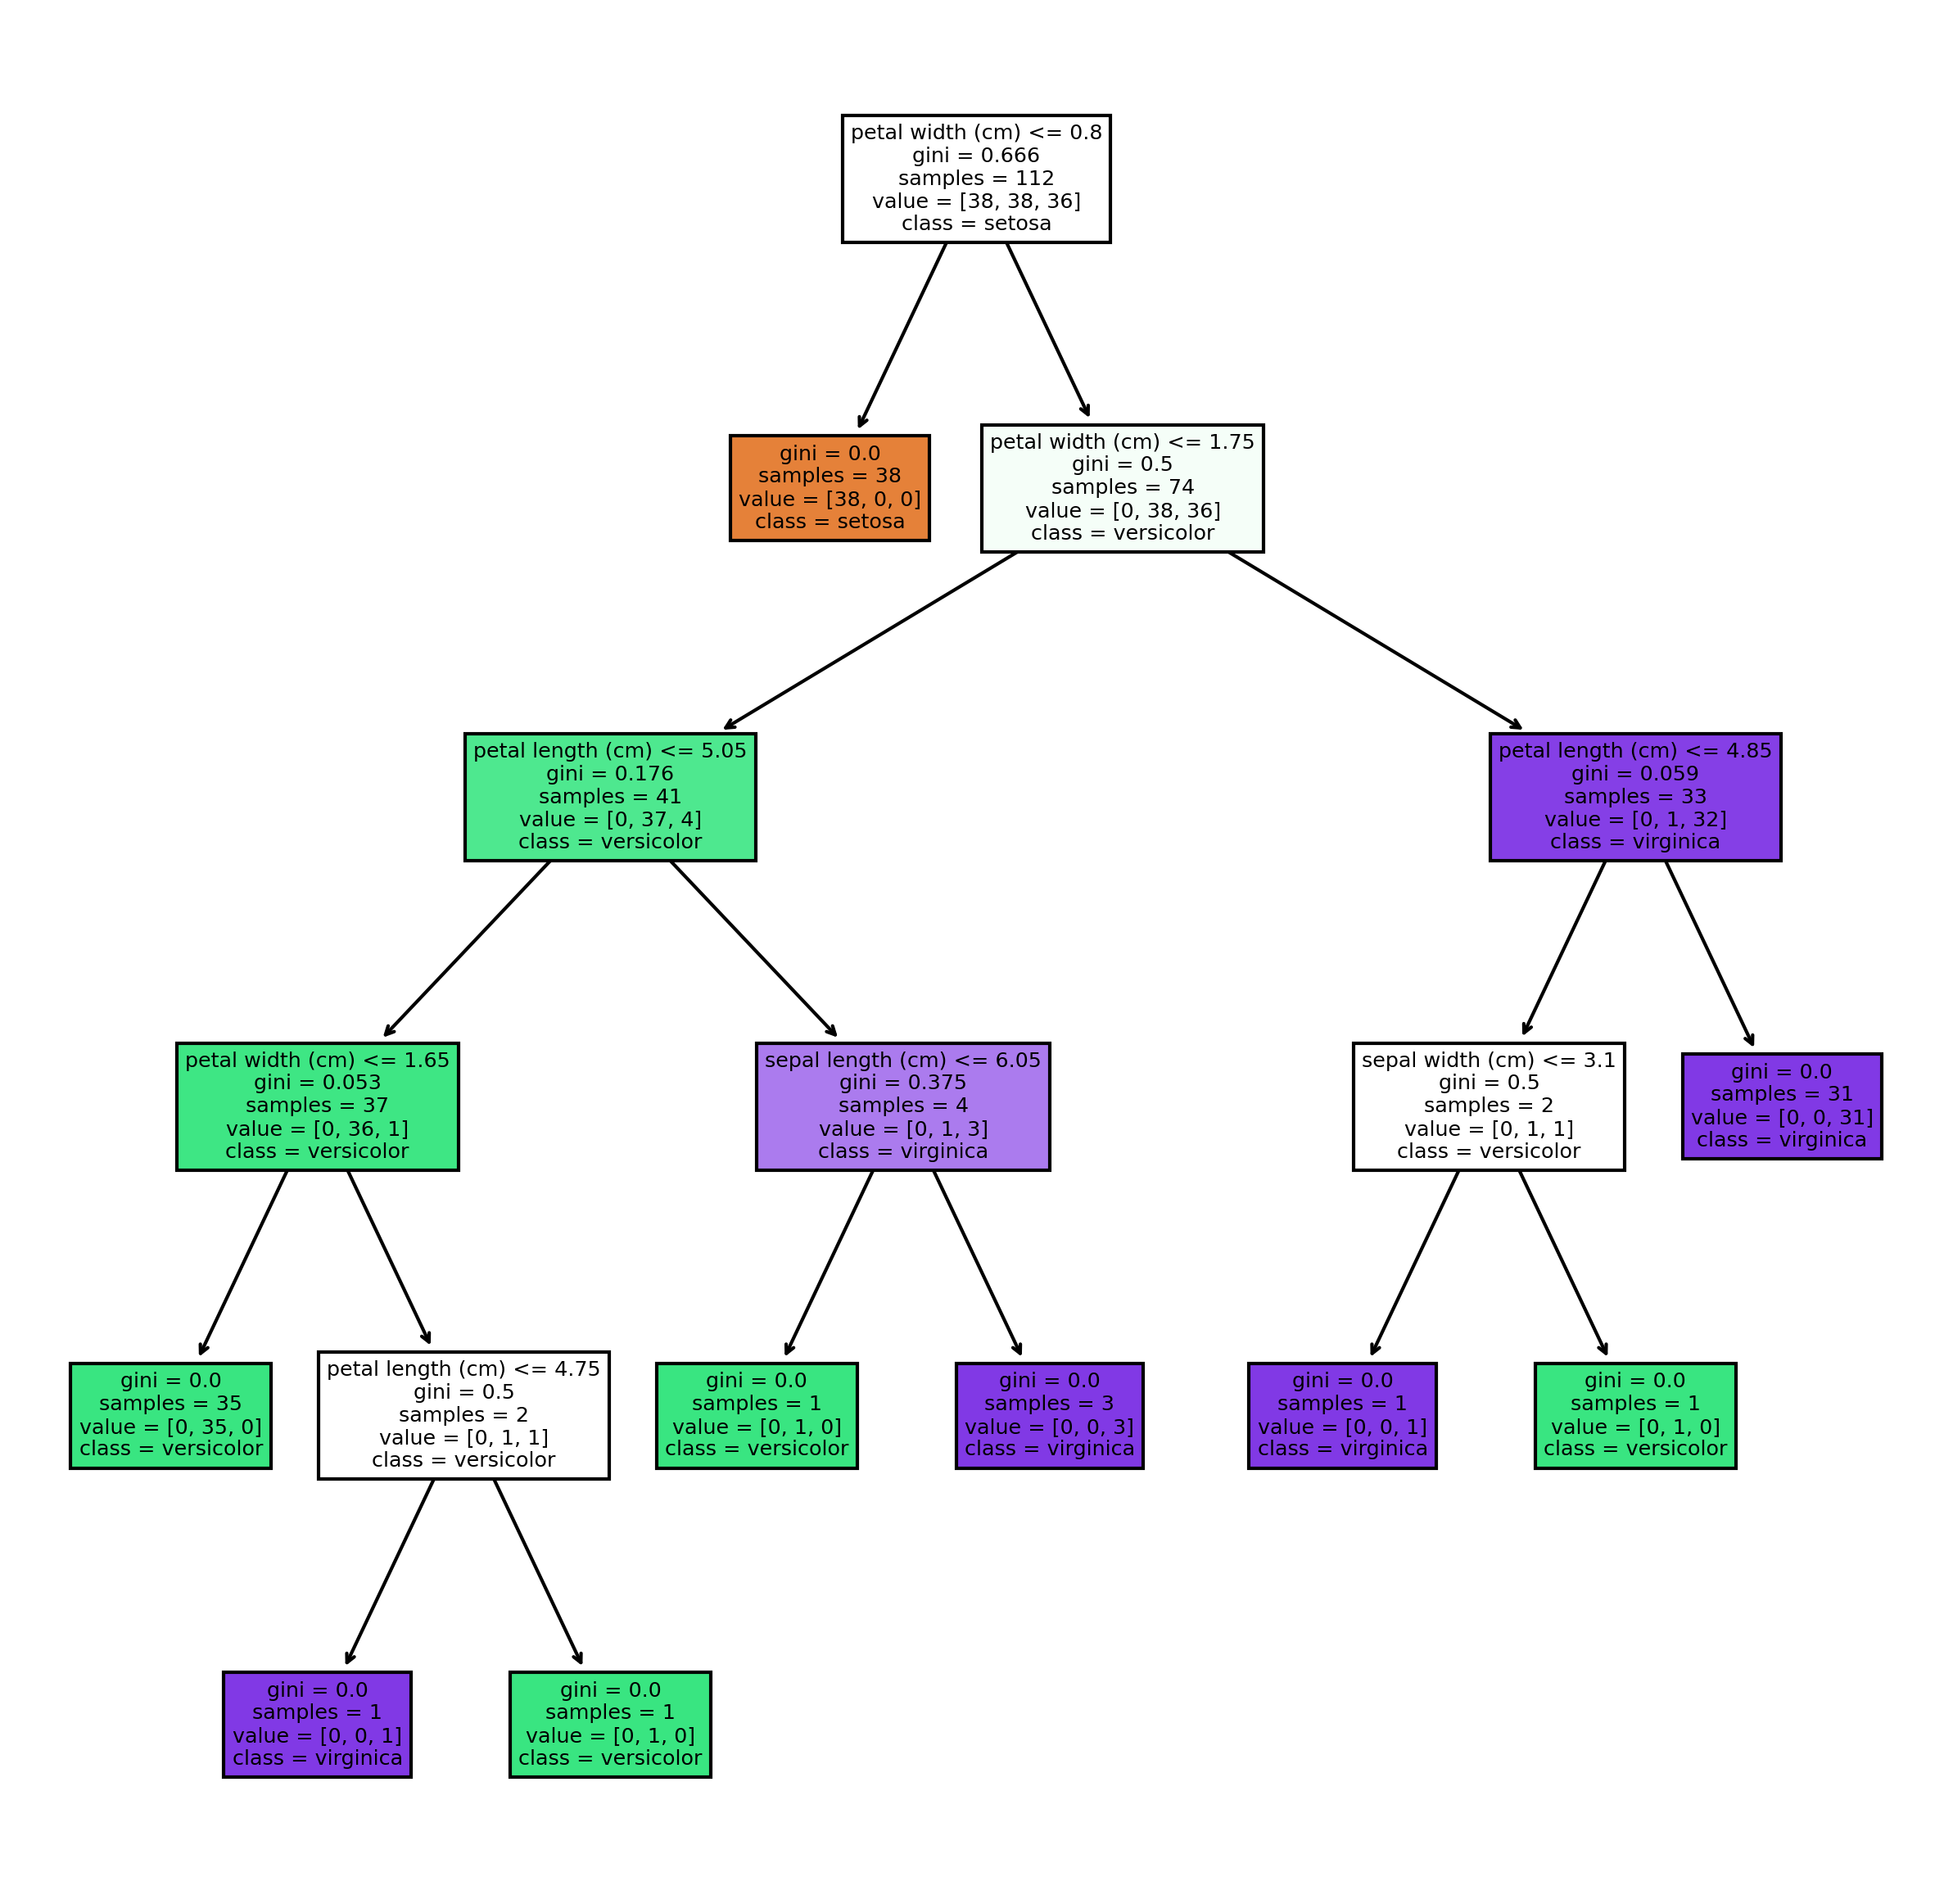

In [ ]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True)